In [1]:
# data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import math

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# modeling
import pandas as pd
import numpy as np
import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import tensorflow as tf

# remove warnings seaborn plotting
import warnings
warnings.filterwarnings('ignore')

# upload file
import os

# save model
import joblib

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
dataset = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Dataset Clean/Dataset Tempat.xlsx')

Mounted at /content/gdrive


In [3]:
dataset

,Place_ID,Name,Image,URL,Rating,Num_Rating,Category,Address,Longitude,Latitude
0,1,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.com/maps/place/Mr.K+Cafe+Go...,4.5,6235,Tempat Makan,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795
1,2,Super Penyet Setiabudi,https://lh5.googleusercontent.com/p/AF1QipMufn...,https://www.google.com/maps/place/Super+Penyet...,4.4,5702,Tempat Makan,"Jl. Setia Budi No.207, Banyumanik, Kota Semarang",110.411722,-7.058634
2,3,Sim Six (Sim-6) garden Resto Ngesrep timur,https://lh5.googleusercontent.com/p/AF1QipPfQx...,https://www.google.com/maps/place/Sim+Six+%28S...,4.5,4265,Tempat Makan,"Jl. Ngesrep Tim. V No.25, Banyumanik, Kota Sem...",110.417238,-7.064682
3,4,Sowak (Sop Iwak),https://lh5.googleusercontent.com/p/AF1QipPKYy...,https://www.google.com/maps/place/Sowak+%28Sop...,4.4,4251,Tempat Makan,"Jl. Banjarsari Selatan No.18, Banyumanik, Kota...",110.432990,-7.061215
4,5,Warung Lesehan Fifty Fifty Sumurboto Banyumanik,https://lh5.googleusercontent.com/p/AF1QipNxvJ...,https://www.google.com/maps/place/Warung+Leseh...,4.3,3822,Tempat Makan,"Jl. Ngesrep Tim. V No.118, Banyumanik, Kota Se...",110.426369,-7.053008
...,...,...,...,...,...,...,...,...,...,...
560,561,Eastman Café,https://lh5.googleusercontent.com/p/AF1QipNQDd...,https://www.google.co.id/maps/place/Eastman+Ca...,4.6,180,Kafe,"Jl. Mugas Jl. Tri Lomba Juang No.5, Tugu, Kota...",110.384508,-7.016921
561,562,KOJA KOPI BAJA + BAHAN MATERIAL BANGUNAN SEGAL...,https://lh5.googleusercontent.com/p/AF1QipMLEL...,https://www.google.co.id/maps/place/KOJA+KOPI+...,4.8,124,Kafe,"Randu Garut, Tugu, Kota Semarang",110.336398,-7.165186
562,563,Angkringan Tugu,https://lh5.googleusercontent.com/p/AF1QipMjrn...,https://www.google.co.id/maps/place/Angkringan...,4.7,71,Kafe,"Jl. Candi Pawon Selatan XI No.23, Tugu, Kota S...",110.322564,-6.975750
563,564,KL Coffee,https://lh5.googleusercontent.com/p/AF1QipP4bL...,https://www.google.co.id/maps/place/KL+Coffee/...,4.7,36,Kafe,"Jl. Mulawarman Raya No.21, Tugu, Kota Semarang",110.425910,-6.968165


In [5]:
coordinate = dataset[['Longitude','Latitude']]

In [6]:
# SSE values for different K
sse_values = []
K = range(1, 25)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(coordinate)
    sse_values.append(kmeans.inertia_)

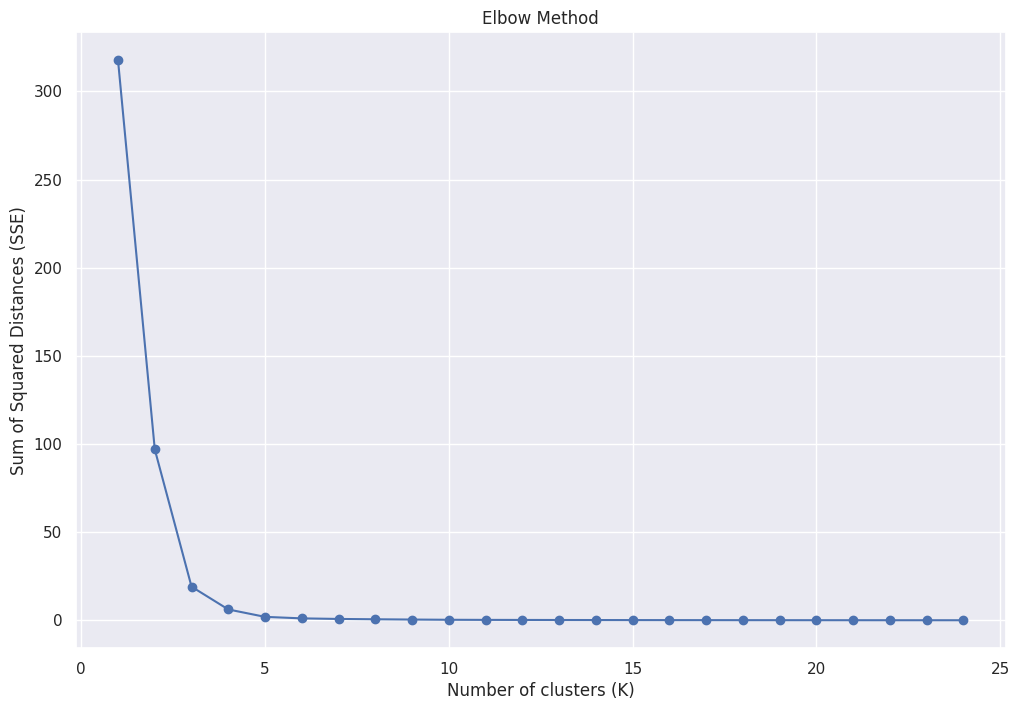

In [7]:
# Plot SSE values against K
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(K, sse_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

# Silhouette scores for different K
silhouette_scores = []
K = range(2, 25)
for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(coordinate)
    score = silhouette_score(coordinate, labels)
    silhouette_scores.append(score)

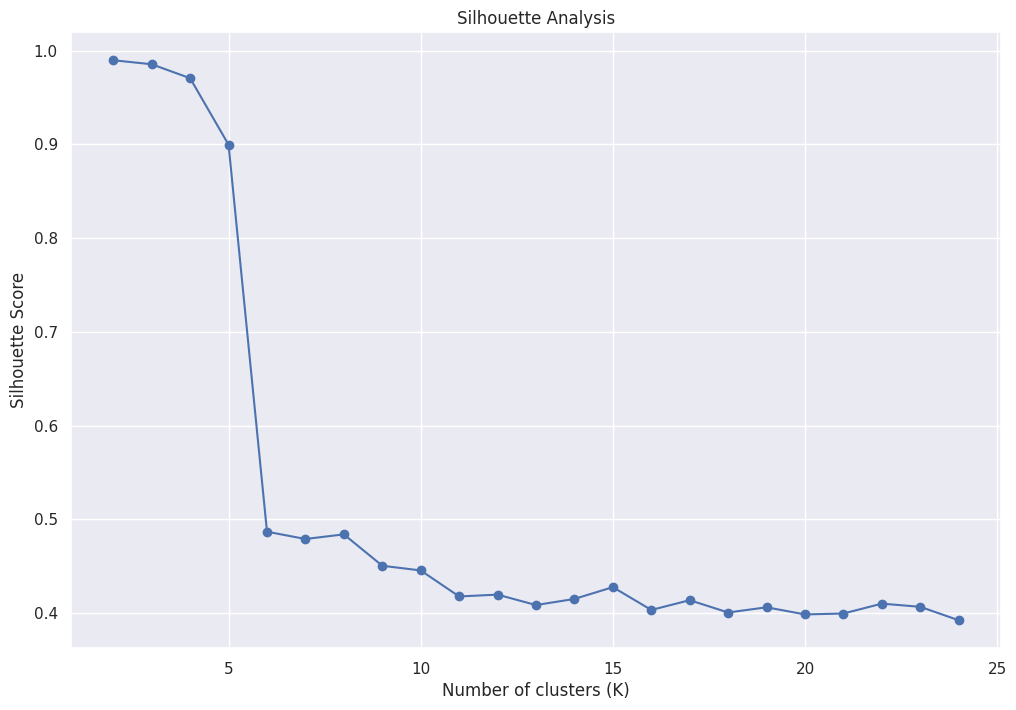

In [9]:
# Plot silhouette scores against K
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [20]:
# Number of optimal clusters
num_clusters = 18

# Create a K-means clustering model
model = KMeans(n_clusters=num_clusters, init='k-means++')

# Fit the model to the data
history = model.fit(coordinate)

# Get the cluster labels for each coordinate
cluster_labels = model.labels_

In [21]:
dataset['cluster_labels'] = model.predict(dataset[['Longitude','Latitude']])
dataset

,Place_ID,Name,Image,URL,Rating,Num_Rating,Category,Address,Longitude,Latitude,cluster_labels
0,1,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.com/maps/place/Mr.K+Cafe+Go...,4.5,6235,Tempat Makan,"Jl. Setia Budi No.28, Banyumanik, Kota Semarang",110.418685,-7.038795,8
1,2,Super Penyet Setiabudi,https://lh5.googleusercontent.com/p/AF1QipMufn...,https://www.google.com/maps/place/Super+Penyet...,4.4,5702,Tempat Makan,"Jl. Setia Budi No.207, Banyumanik, Kota Semarang",110.411722,-7.058634,11
2,3,Sim Six (Sim-6) garden Resto Ngesrep timur,https://lh5.googleusercontent.com/p/AF1QipPfQx...,https://www.google.com/maps/place/Sim+Six+%28S...,4.5,4265,Tempat Makan,"Jl. Ngesrep Tim. V No.25, Banyumanik, Kota Sem...",110.417238,-7.064682,8
3,4,Sowak (Sop Iwak),https://lh5.googleusercontent.com/p/AF1QipPKYy...,https://www.google.com/maps/place/Sowak+%28Sop...,4.4,4251,Tempat Makan,"Jl. Banjarsari Selatan No.18, Banyumanik, Kota...",110.432990,-7.061215,8
4,5,Warung Lesehan Fifty Fifty Sumurboto Banyumanik,https://lh5.googleusercontent.com/p/AF1QipNxvJ...,https://www.google.com/maps/place/Warung+Leseh...,4.3,3822,Tempat Makan,"Jl. Ngesrep Tim. V No.118, Banyumanik, Kota Se...",110.426369,-7.053008,8
...,...,...,...,...,...,...,...,...,...,...,...
560,561,Eastman Café,https://lh5.googleusercontent.com/p/AF1QipNQDd...,https://www.google.co.id/maps/place/Eastman+Ca...,4.6,180,Kafe,"Jl. Mugas Jl. Tri Lomba Juang No.5, Tugu, Kota...",110.384508,-7.016921,6
561,562,KOJA KOPI BAJA + BAHAN MATERIAL BANGUNAN SEGAL...,https://lh5.googleusercontent.com/p/AF1QipMLEL...,https://www.google.co.id/maps/place/KOJA+KOPI+...,4.8,124,Kafe,"Randu Garut, Tugu, Kota Semarang",110.336398,-7.165186,12
562,563,Angkringan Tugu,https://lh5.googleusercontent.com/p/AF1QipMjrn...,https://www.google.co.id/maps/place/Angkringan...,4.7,71,Kafe,"Jl. Candi Pawon Selatan XI No.23, Tugu, Kota S...",110.322564,-6.975750,15
563,564,KL Coffee,https://lh5.googleusercontent.com/p/AF1QipP4bL...,https://www.google.co.id/maps/place/KL+Coffee/...,4.7,36,Kafe,"Jl. Mulawarman Raya No.21, Tugu, Kota Semarang",110.425910,-6.968165,17


In [22]:
dataset.to_excel('Places_Dataset.xlsx', index = False)

In [27]:
places_dataset = dataset.copy()

In [28]:
def calculate_distance(location1, location2):
    lat1, lon1 = location1
    lat2, lon2 = location2
    # Calculate the distance using the Haversine formula
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius is approximately 6371 km

    return distance

In [29]:
def predicts():
    # Get the JSON data from the request
    user_latitude = -6.898647901908838
    user_longitude = 110.40228767871858
    user_location = (user_latitude, user_longitude)

    # Create a feature vector from the longitude and latitude
    features = np.array([user_longitude, user_latitude]).reshape(1, -1)

    # Predict the label using the K-means model
    label = model.predict(features)

    # Filter locations in the same cluster as the predicted label
    cluster_locations = places_dataset[places_dataset['cluster_labels'] == label[0]]

    cluster_locations.loc[:, 'distance'] = cluster_locations.apply(
        lambda row: calculate_distance(user_location, (row['Latitude'], row['Longitude'])), axis=1)

    # Sort locations by distance and number of ratings
    location_recommendations = cluster_locations.sort_values(['distance', 'Num_Rating'], ascending=[True, False])

    # Filter out any duplicate places
    location_recommendations = location_recommendations.drop_duplicates(subset=['Name'])

    # Filter recommendations for each category
    restaurant_recommendations = location_recommendations[
        location_recommendations['Category'] == 'Tempat Makan'].head(2)
    cafe_recommendation = location_recommendations[
        location_recommendations['Category'] == 'Kafe'].head(1)
    souvenir_recommendation = location_recommendations[
        location_recommendations['Category'] == 'Toko Suvenir'].head(1)
    oleh_oleh_recommendation = location_recommendations[
        location_recommendations['Category'] == 'Toko Oleh-Oleh'].head(1)

    # Combine all the recommendations
    all_location_recommendations = pd.concat([restaurant_recommendations,
                                              cafe_recommendation,
                                              souvenir_recommendation,
                                              oleh_oleh_recommendation])

    # Create a list of recommended place dictionaries
    location_recommended = []
    for _, row in all_location_recommendations.iterrows():
        result = {
            'place_id': row['Place_ID'],  # Add the place ID to the result
            'name': row['Name'],
            'rating': row['Rating'],
            'address': row['Address'],
            'num_ratings': row['Num_Rating'],
            'category': row['Category'],
            'image': row['Image'],
            'url': row['URL'],
            'distance': f"{round(row['distance'], 2)} km"
        }
        location_recommended.append(result)
    return location_recommended

In [30]:
recommended_places = predicts()

for place in recommended_places:
    print("Place ID:", place['place_id'])
    print("Name:", place['name'])
    print("Rating:", place['rating'])
    print("Num_Rating:", place['num_ratings'])
    print("Category:", place['category'])
    print("Address:", place['address'])
    print("Distance:", place['distance'])
    print("Image:", place['image'])
    print("URL:", place['url'])
    print()

Place ID: 134
Name: RM. Sama Rasa
Rating: 4.5
Num_Rating: 1805
Category: Tempat Makan
Address: Jl. Roda Mas No.32, Semarang Utara, Kota Semarang
Distance: 6.68 km
Image: https://lh5.googleusercontent.com/p/AF1QipMNOA0XHVvFxWd8cMtbNyUrkSkr0WinPHsMkOFV=w122-h92-k-no
URL: https://www.google.com/maps/place/RM.+Sama+Rasa/data=!4m7!3m6!1s0x2e70f4be8376c133:0x9b044566fc0f78a1!8m2!3d-6.9586779!4d110.4079965!16s%2Fg%2F11cjj03nxc!19sChIJM8F2g770cC4RoXgP_GZFBJs?authuser=0&hl=id&rclk=1

Place ID: 133
Name: Seafood Pak Sangklak Semarang
Rating: 4.4
Num_Rating: 1978
Category: Tempat Makan
Address: Jl. Telagamas Raya No.B1, Semarang Utara, Kota Semarang
Distance: 6.75 km
Image: https://lh5.googleusercontent.com/p/AF1QipOA4iVJp7xh-AFPuQPec3L9Y79dF8VwaS2cRo37=w163-h92-k-no
URL: https://www.google.com/maps/place/Seafood+Pak+Sangklak+Semarang/data=!4m7!3m6!1s0x2e70f4be9d044073:0x983a000c38fab32!8m2!3d-6.9591532!4d110.4098702!16s%2Fg%2F1pzw0pv23!19sChIJc0AEnb70cC4RMquPwwCggwk?authuser=0&hl=id&rclk=1

Plac

In [31]:
# Save the model to a file
joblib.dump(model, 'location_model.h5')

['location_model.h5']

In [32]:
# Save the model using joblib
joblib.dump(kmeans, 'location_model.pkl')

['location_model.pkl']

In [33]:
# Save the model using joblib
joblib.dump(kmeans, 'location_model.joblib')

['location_model.joblib']